In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

In [ ]:
# Load MNIST
(x_mnist, y_mnist), (x_mnist_test, y_mnist_test) = tf.keras.datasets.mnist.load_data()

# Normalize
x_mnist = x_mnist.astype('float32') / 255.0
x_mnist_test = x_mnist_test.astype('float32') / 255.0

print(f"MNIST train shape: {x_mnist.shape}, labels: {np.unique(y_mnist)}")

MNIST train shape: (60000, 28, 28), labels: [0 1 2 3 4 5 6 7 8 9]


In [ ]:
# Merge data
x_mnist_full = np.concatenate([x_mnist, x_mnist_test], axis=0)
y_mnist_full = np.concatenate([y_mnist, y_mnist_test], axis=0)

print(f"Combined MNIST shape: {x_mnist_full.shape}, Labels: {np.unique(y_mnist_full)}")

Combined MNIST shape: (70000, 28, 28), Labels: [0 1 2 3 4 5 6 7 8 9]


In [ ]:
# Assuming you've already merged the datasets as x_mnist_full and y_mnist_full
label_freq_mnist = pd.Series(y_mnist_full).value_counts().sort_index()

print("Label Frequencies in Combined MNIST Dataset:")
print(label_freq_mnist)

Label Frequencies in Combined MNIST Dataset:
0    6903
1    7877
2    6990
3    7141
4    6824
5    6313
6    6876
7    7293
8    6825
9    6958
Name: count, dtype: int64


In [ ]:
# Load A–Z alphabet dataset
df = pd.read_csv('/content/A_Z Handwritten Data.csv').astype('float32')
x_az = df.drop('0', axis=1).values
y_az = df['0'].values.astype(int)

# Normalize and reshape A–Z dataset
x_az = x_az / 255.0
x_az = x_az.reshape(-1, 28, 28)

In [ ]:
# Shift A–Z labels from 0–25 → 10–35
y_az += 10

print(f"A–Z dataset shape: {x_az.shape}, labels: {np.unique(y_az)}")

A–Z dataset shape: (372450, 28, 28), labels: [10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33
 34 35]


In [ ]:
# Check label frequency
label_freq = pd.Series(y_az).value_counts().sort_index()
print(label_freq)

10    13869
11     8668
12    23409
13    10134
14    11440
15     1163
16     5762
17     7218
18     1120
19     8493
20     5603
21    11586
22    12336
23    19010
24    57825
25    19341
26     5812
27    11566
28    48419
29    22495
30    29008
31     4182
32    10784
33     6272
34    10859
35     6076
Name: count, dtype: int64


In [ ]:
min_freq = label_freq.min()
print("Minimum frequency:", min_freq)

Minimum frequency: 1120


In [ ]:
# Combine MNIST + A–Z
x_combined = np.concatenate([x_mnist, x_az], axis=0)
y_combined = np.concatenate([y_mnist, y_az], axis=0)

print(f"Combined dataset shape: {x_combined.shape}, labels: {np.unique(y_combined)}")

Combined dataset shape: (432450, 28, 28), labels: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35]


In [ ]:
# y_combined contains all labels (0–9 for digits, 10–35 for letters)
label_freq_combined = pd.Series(y_combined).value_counts().sort_index()

print("Label Frequencies (0–9: digits, 10–35: A–Z):")
print(label_freq_combined)
min_freq = label_freq.min()
print("Minimum frequency:", min_freq)

Label Frequencies (0–9: digits, 10–35: A–Z):
0      5923
1      6742
2      5958
3      6131
4      5842
5      5421
6      5918
7      6265
8      5851
9      5949
10    13869
11     8668
12    23409
13    10134
14    11440
15     1163
16     5762
17     7218
18     1120
19     8493
20     5603
21    11586
22    12336
23    19010
24    57825
25    19341
26     5812
27    11566
28    48419
29    22495
30    29008
31     4182
32    10784
33     6272
34    10859
35     6076
Name: count, dtype: int64
Minimum frequency: 1120


In [ ]:
# Assume x_combined and y_combined are already defined
min_count = 1120

# Flatten x_combined for easier DataFrame creation (28x28 → 784)
x_flat = x_combined.reshape(x_combined.shape[0], -1)

# Combine into a DataFrame
df_combined = pd.DataFrame(x_flat)
df_combined['label'] = y_combined

# Group by label and sample
df_balanced = df_combined.groupby('label').apply(lambda x: x.sample(n=min_count, random_state=42)).reset_index(drop=True)

# Separate back into x and y, and reshape x to (28, 28)
x_balanced = df_balanced.drop('label', axis=1).values.reshape(-1, 28, 28)
y_balanced = df_balanced['label'].values

# Shuffle the balanced dataset
from sklearn.utils import shuffle
x_balanced, y_balanced = shuffle(x_balanced, y_balanced, random_state=42)

# Final check
print(f"Balanced x shape: {x_balanced.shape}, y shape: {y_balanced.shape}")
print("Label frequencies in balanced dataset:")
print(pd.Series(y_balanced).value_counts().sort_index())

<ipython-input-28-611082020>:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_balanced = df_combined.groupby('label').apply(lambda x: x.sample(n=min_count, random_state=42)).reset_index(drop=True)


Balanced x shape: (40320, 28, 28), y shape: (40320,)
Label frequencies in balanced dataset:
0     1120
1     1120
2     1120
3     1120
4     1120
5     1120
6     1120
7     1120
8     1120
9     1120
10    1120
11    1120
12    1120
13    1120
14    1120
15    1120
16    1120
17    1120
18    1120
19    1120
20    1120
21    1120
22    1120
23    1120
24    1120
25    1120
26    1120
27    1120
28    1120
29    1120
30    1120
31    1120
32    1120
33    1120
34    1120
35    1120
Name: count, dtype: int64


In [ ]:
# Flatten x to 2D (samples, 784)
x_flat = x_balanced.reshape(x_balanced.shape[0], -1)

# Create DataFrame with label column first
df_saved = pd.DataFrame(x_flat)
df_saved.insert(0, 'label', y_balanced)

# Save to CSV
df_saved.to_csv("balanced_mnist_az.csv", index=False)

KeyboardInterrupt: 

# Balanced Dataset Upload and Model Training

In [ ]:
# Load A–Z alphabet dataset
df_balanced = pd.read_csv('/content/balanced_mnist_az.csv').astype('float32')

# Separate back into x and y, and reshape x to (28, 28)
x_balanced = df_balanced.drop('label', axis=1).values.reshape(-1, 28, 28)
y_balanced = df_balanced['label'].values

# Shuffle the balanced dataset
from sklearn.utils import shuffle
x_balanced, y_balanced = shuffle(x_balanced, y_balanced, random_state=42)

# Final check
print(f"Balanced x shape: {x_balanced.shape}, y shape: {y_balanced.shape}")
print("Label frequencies in balanced dataset:")
print(pd.Series(y_balanced).value_counts().sort_index())

Balanced x shape: (40320, 28, 28), y shape: (40320,)
Label frequencies in balanced dataset:
0.0     1120
1.0     1120
2.0     1120
3.0     1120
4.0     1120
5.0     1120
6.0     1120
7.0     1120
8.0     1120
9.0     1120
10.0    1120
11.0    1120
12.0    1120
13.0    1120
14.0    1120
15.0    1120
16.0    1120
17.0    1120
18.0    1120
19.0    1120
20.0    1120
21.0    1120
22.0    1120
23.0    1120
24.0    1120
25.0    1120
26.0    1120
27.0    1120
28.0    1120
29.0    1120
30.0    1120
31.0    1120
32.0    1120
33.0    1120
34.0    1120
35.0    1120
Name: count, dtype: int64


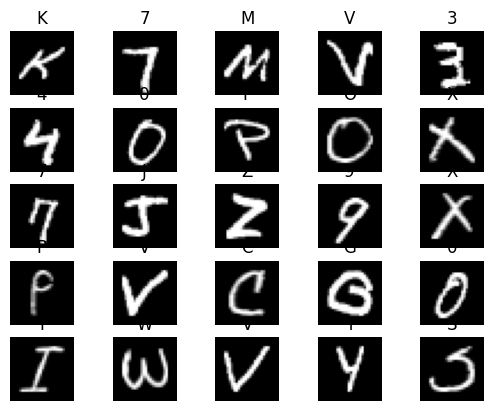

In [ ]:
for i, idx in enumerate(indices):
    plt.subplot(5, 5, i + 1)
    plt.imshow(x_balanced[idx], cmap='gray')

    # Show label: digits (0–9) or letters (10–35)
    label = y_balanced[idx]
    if label < 10:
        title = str(int(label))
    else:
        title = chr(ord('A') + int(label) - 10)  # FIXED LINE

    plt.title(title)
    plt.axis('off')


In [ ]:
# shuffle and split
x_train, x_test, y_train, y_test = train_test_split(x_balanced, y_balanced, test_size=0.2, random_state=42, stratify=y_balanced)

x_train.shape, y_train.shape

((32256, 28, 28), (32256,))

In [ ]:
# Add channel dimension (batch_size, height, width, channels)
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

print(f"Final shapes → x_train: {x_train.shape}, y_train: {y_train.shape}")

Final shapes → x_train: (32256, 28, 28, 1), y_train: (32256,)


In [ ]:
label_map = {}

# Add digit labels 0–9
for i in range(10):
    label_map[i] = str(i)  # 0: '0', 1: '1', ..., 9: '9'

# Add letter labels 10–35 → 'A' to 'Z'
for i in range(26):
    label_map[i + 10] = chr(ord('A') + i)  # 10: 'A', 11: 'B', ..., 35: 'Z'

In [ ]:
label_map

{0: '0',
 1: '1',
 2: '2',
 3: '3',
 4: '4',
 5: '5',
 6: '6',
 7: '7',
 8: '8',
 9: '9',
 10: 'A',
 11: 'B',
 12: 'C',
 13: 'D',
 14: 'E',
 15: 'F',
 16: 'G',
 17: 'H',
 18: 'I',
 19: 'J',
 20: 'K',
 21: 'L',
 22: 'M',
 23: 'N',
 24: 'O',
 25: 'P',
 26: 'Q',
 27: 'R',
 28: 'S',
 29: 'T',
 30: 'U',
 31: 'V',
 32: 'W',
 33: 'X',
 34: 'Y',
 35: 'Z'}

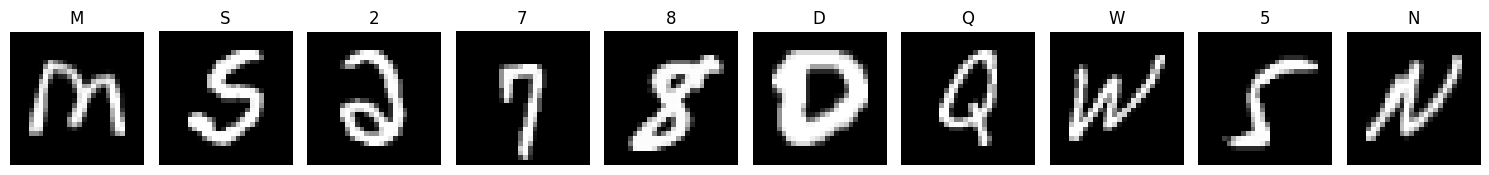

In [ ]:
plt.figure(figsize=(15, 3))
for i in range(10):
    idx = np.random.randint(len(x_train))
    plt.subplot(1, 10, i + 1)
    plt.imshow(x_train[idx].squeeze(), cmap='gray')
    plt.title(label_map[y_train[idx]])
    plt.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
x_train.shape, y_train.shape

((32256, 28, 28, 1), (32256,))

In [ ]:
x_test.shape, y_test.shape

((8064, 28, 28, 1), (8064,))

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Flatten the 28x28 images and output 36 class probabilities
model = models.Sequential([
    layers.Input(shape=(28, 28, 1)),          # Input layer for grayscale images
    layers.Flatten(),                         # Flatten to 784 (28x28)
    layers.Dense(36, activation='softmax')    # Output layer for 36 classes
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',   # Use integer labels
    metrics=['accuracy']
)

# Show model structure
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 36)             │        28,260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 28,260 (110.39 KB)

 Trainable params: 28,260 (110.39 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    epochs=100,
    batch_size=128
)

# Evaluate on test set
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"\n Test Accuracy: {test_accuracy:.4f}")

# Get final training accuracy
train_accuracy = history.history['accuracy'][-1]
print(f" Final Training Accuracy: {train_accuracy:.4f}")

Epoch 1/10
252/252 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4358 - loss: 2.4147 - val_accuracy: 0.7318 - val_loss: 1.1416
Epoch 2/10
252/252 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7487 - loss: 1.0419 - val_accuracy: 0.7705 - val_loss: 0.9030
Epoch 3/10
252/252 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7898 - loss: 0.8418 - val_accuracy: 0.7935 - val_loss: 0.8063
Epoch 4/10
252/252 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8102 - loss: 0.7597 - val_accuracy: 0.8005 - val_loss: 0.7557
Epoch 5/10
252/252 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8211 - loss: 0.7008 - val_accuracy: 0.8046 - val_loss: 0.7251
Epoch 6/10
252/252 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8234 - loss: 0.6797 - val_accuracy: 0.8098 - val_loss: 0.6999
Epoch 7/10
252/252 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8299 - loss: 0.6618 - val_accuracy: 0.8134 - val_loss: 0.6854
Epoch 8/10
252/252 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8366 - loss: 0.6330 - val_accuracy: 0.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


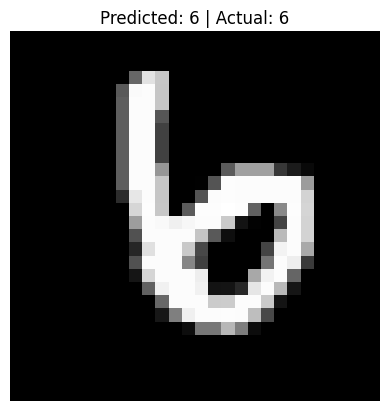

In [ ]:
# Define the label map (if you don't already have it)
label_map = {i: str(i) for i in range(10)}  # 0–9
label_map.update({i + 10: chr(ord('A') + i) for i in range(26)})  # 10–35 → A–Z

# Pick one image from the test set
index = np.random.randint(len(x_test))  # Random index
img = x_test[index]
true_label = y_test[index]

# Predict (model expects batch input → add extra dimension)
prediction = model.predict(np.expand_dims(img, axis=0))
predicted_label = np.argmax(prediction)


# Plot the image
plt.imshow(img.squeeze(), cmap='gray')
plt.title(f"Predicted: {label_map[predicted_label]} | Actual: {label_map[int(true_label)]}")
plt.axis('off')
plt.show()

# Transforming Custom Data

In [ ]:
from PIL import Image
import numpy as np
import os

In [ ]:
from PIL import Image
import numpy as np
import os

image_folder = '/content/images'
processed_images = []

for filename in os.listdir(image_folder):
    if filename.lower().endswith('.jpg'):
        img_path = os.path.join(image_folder, filename)

        # Load and convert to grayscale
        img = Image.open(img_path).convert('L')

        # Resize to 28x28
        img_resized = img.resize((28, 28))

        # Convert to NumPy array and normalize
        img_array = np.array(img_resized).astype('float32') / 255.0

        # Invert the pixel values (white → black, black → white)
        img_array = 1.0 - img_array

        # Add channel dimension
        img_array = np.expand_dims(img_array, axis=-1)

        processed_images.append(img_array)

x_images = np.array(processed_images)
print(f"Processed {len(x_images)} images. Shape: {x_images.shape}")

Processed 13 images. Shape: (13, 28, 28, 1)


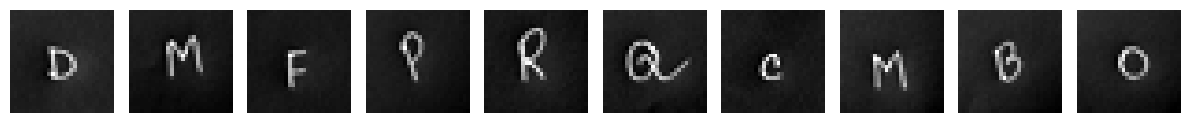

In [ ]:
# Plot the first 10 images
plt.figure(figsize=(12, 2))

for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.imshow(x_images[i].squeeze(), cmap='gray')  # .squeeze() removes the extra channel
    plt.axis('off')

plt.tight_layout()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


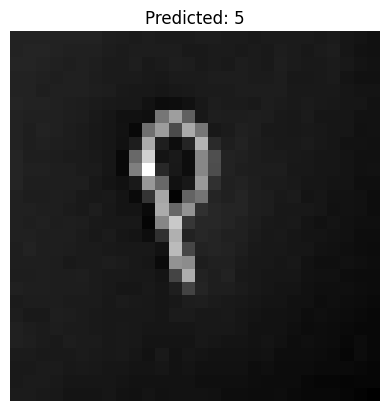

In [ ]:
# Define the label map (if you don't already have it)
label_map = {i: str(i) for i in range(10)}  # 0–9
label_map.update({i + 10: chr(ord('A') + i) for i in range(26)})  # 10–35 → A–Z

# Pick one image from the test set
# index = np.random.randint(len(x_test))  # Random index
img = x_images[3]
# true_label = y_test[index]

# Predict (model expects batch input → add extra dimension)
prediction = model.predict(np.expand_dims(img, axis=0))
predicted_label = np.argmax(prediction)

# Plot the image
plt.imshow(img.squeeze(), cmap='gray')
plt.title(f"Predicted: {label_map[predicted_label]}")
plt.axis('off')
plt.show()